In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult_with_headers.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


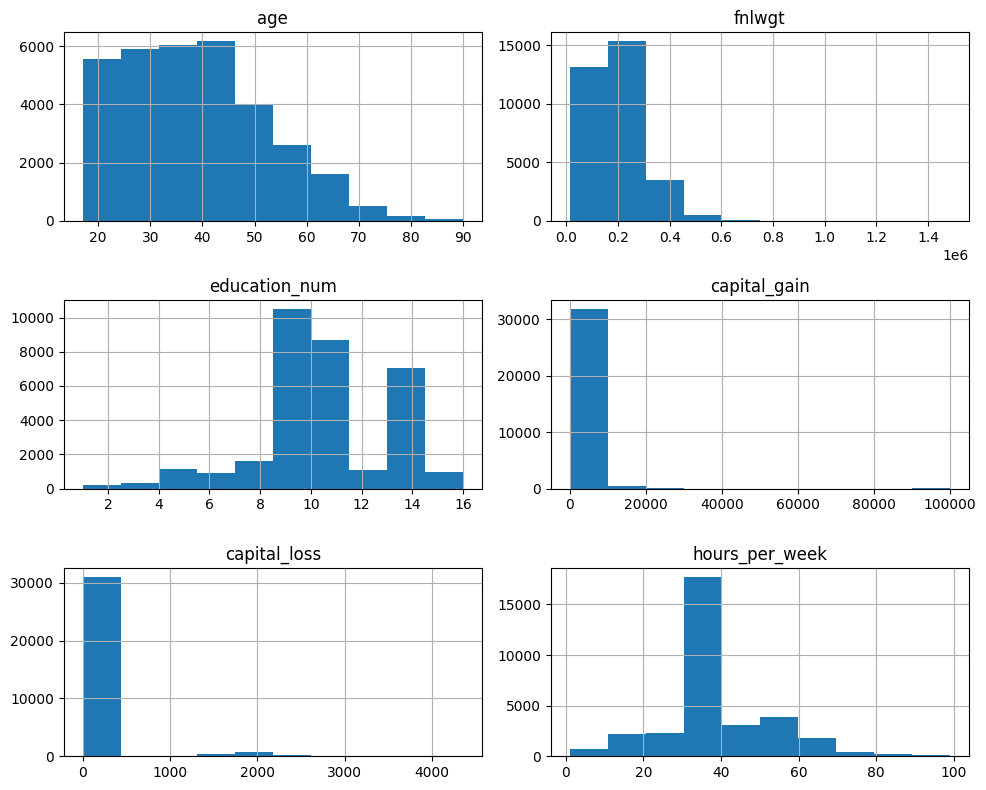

In [8]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.replace(" ?", np.nan, inplace=True)
df.isnull().sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [12]:
# Identify columns with null values
cols_with_nulls = df.columns[df.isnull().any()].tolist()

# Impute null values with the mode of each column
for col in cols_with_nulls:
    mode_value = df[col].mode()[0] # Calculate mode and get the first value in case of multiple modes
    df[col] = df[col].fillna(mode_value) # Use direct assignment instead of inplace

# Verify that null values have been filled
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the standardized data
display(df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [15]:
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
------------------------------
Unique values in 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
------------------------------
Unique values in 'marital_status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
------------------------------
Unique values in 'occupation':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
------------------------------
Unique values in 'relationship':
[' Not-in-family' ' Husband' ' Wi

In [16]:
binary_cols = ['sex', 'income']
multi_cols = ['workclass', 'education', 'marital_status',
              'occupation', 'relationship', 'race', 'native_country']


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_binary_encoded = pd.DataFrame(encoder.fit_transform(df[binary_cols]), columns=encoder.get_feature_names_out(binary_cols))

display(df_binary_encoded.head())

,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the multi_cols
df_multi_encoded = df[multi_cols].copy() # Create a copy to avoid SettingWithCopyWarning
for col in multi_cols:
    le = LabelEncoder()
    df_multi_encoded[col] = le.fit_transform(df_multi_encoded[col])

# Display the first few rows of the label encoded multi columns
display(df_multi_encoded.head())

,workclass,education,marital_status,occupation,relationship,race,native_country
0,6,9,4,0,1,4,38
1,5,9,2,3,0,4,38
2,3,11,0,5,1,4,38
3,3,1,2,5,0,2,38
4,3,9,2,9,5,2,4


In [19]:
# Identify the numerical columns from the original dataframe
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Select only the numerical columns from the original dataframe
df_numerical = df[numerical_cols]

# Concatenate the numerical, binary encoded, and multi-category encoded dataframes
df_final = pd.concat([df_numerical, df_binary_encoded, df_multi_encoded], axis=1)

# Display the first few rows of the final concatenated dataframe
display(df_final.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.0,1.0,1.0,0.0,6,9,4,0,1,4,38
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,1.0,1.0,0.0,5,9,2,3,0,4,38
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.0,1.0,1.0,0.0,3,11,0,5,1,4,38
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.0,1.0,1.0,0.0,3,1,2,5,0,2,38
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,1.0,0.0,1.0,0.0,3,9,2,9,5,2,4


In [20]:
df.shape

(32561, 15)

In [21]:
# Calculate the correlation matrix of the final dataframe
correlation_matrix = df_final.corr()

# Display the correlation matrix
display(correlation_matrix)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.088832,0.088832,-0.234037,0.234037,0.040504,-0.010508,-0.266288,0.001739,-0.263698,0.028718,-0.000270
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.026858,0.026858,0.009463,-0.009463,-0.024338,-0.028145,0.028153,0.000188,0.008931,-0.021291,-0.063286
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.012280,0.012280,-0.335154,0.335154,0.003536,0.359153,-0.069304,0.070954,-0.094153,0.031838,0.088894
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.048480,0.048480,-0.223329,0.223329,0.031505,0.030046,-0.043393,0.018021,-0.057919,0.011145,0.008819
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.045567,0.045567,-0.150526,0.150526,0.002644,0.016746,-0.034187,0.009680,-0.061062,0.018899,0.009401
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.229309,0.229309,-0.229689,0.229689,0.042199,0.055510,-0.190519,-0.012879,-0.248974,0.041910,0.006592
sex_ Female,-0.088832,-0.026858,-0.012280,-0.048480,-0.045567,-0.229309,1.000000,-1.000000,0.215980,-0.215980,-0.071584,0.027356,0.129314,-0.047461,0.582454,-0.087204,-0.002061
sex_ Male,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,-1.000000,1.000000,-0.215980,0.215980,0.071584,-0.027356,-0.129314,0.047461,-0.582454,0.087204,0.002061
income_ <=50K,-0.234037,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,0.215980,-0.215980,1.000000,-1.000000,-0.002693,-0.079317,0.199307,-0.034625,0.250918,-0.071846,-0.023058
income_ >50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,-0.215980,0.215980,-1.000000,1.000000,0.002693,0.079317,-0.199307,0.034625,-0.250918,0.071846,0.023058


In [22]:
# Feature 1: Married or Not
df['is_married'] = df['marital_status'].apply(lambda x: 1 if 'Married' in x else 0)

# Feature 2: Total Capital (gain - loss)
df['capital_total'] = df['capital_gain'] - df['capital_loss']


In [23]:
import numpy as np

df['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log1p(x))   # log1p = log(x+1)



In [24]:
from sklearn.ensemble import IsolationForest

# Use numerical columns for outlier detection
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

iso = IsolationForest(contamination=0.01, random_state=42)  # 1% expected outliers
outliers = iso.fit_predict(df[num_cols])

# Keep only non-outliers (label = 1)
df_cleaned = df[outliers == 1]
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)


Original shape: (32561, 18)
After removing outliers: (32235, 18)


Outliers are data points that deviate significantly from the overall distribution of a dataset. Their presence can negatively influence the performance of machine learning models in several ways.

Distortion of Statistical Measures
Outliers can heavily affect the mean, variance, and standard deviation of numerical features. Since many algorithms rely on these measures for decision-making, the presence of extreme values may lead to biased model results.

Influence on Model Training
Algorithms such as linear regression, logistic regression, and k-means clustering are highly sensitive to outliers. A few extreme values can disproportionately pull regression lines, shift cluster centroids, or distort decision boundaries, reducing overall accuracy.

Reduction in Generalization Ability
Models trained with outliers may overfit, trying to accommodate these rare observations instead of focusing on the general pattern in the data. This reduces the model’s ability to generalize to unseen data.

Misleading Feature Importance
Outliers can create artificial correlations or inflate the importance of certain features, leading to incorrect interpretations of relationships within the data.

Computational Challenges
In some cases, very large outliers can cause numerical instability, longer training times, or convergence issues in optimization algorithms.

For these reasons, identifying and handling outliers—such as with the Isolation Forest algorithm—is an important step in data preprocessing. Proper treatment ensures that the model learns from the underlying patterns in the data rather than being misled by rare, extreme values.

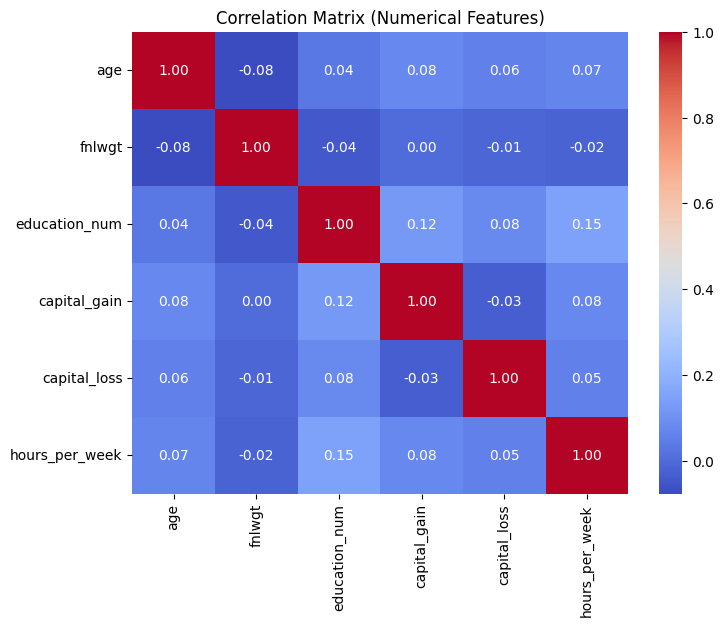

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to calculate PPS for a single pair of variables
def calculate_pps(df, feature, target):
    # Handle potential NaNs in selected columns before encoding
    temp_df = df[[feature, target]].dropna().copy()

    # Label encode the feature and target
    le_feature = LabelEncoder()
    le_target = LabelEncoder()

    temp_df[feature + '_encoded'] = le_feature.fit_transform(temp_df[feature])
    temp_df[target + '_encoded'] = le_target.fit_transform(temp_df[target])

    X = temp_df[[feature + '_encoded']]
    y = temp_df[target + '_encoded']

    # Use a simple model (Decision Tree)
    model = DecisionTreeClassifier(random_state=42)

    # Calculate cross-validated score
    # Using balanced accuracy for classification tasks with potential class imbalance
    scores = cross_val_score(model, X, y, cv=5, scoring='balanced_accuracy')

    # PPS is the average score
    pps_score = scores.mean()

    return pps_score

# Example usage: Calculate PPS of 'education' predicting 'income'
pps_education_income = calculate_pps(df, 'education', 'income')
print(f"PPS of 'education' predicting 'income': {pps_education_income:.4f}")

# You can repeat this for other pairs of variables
# pps_occupation_income = calculate_pps(df, 'occupation', 'income')
# print(f"PPS of 'occupation' predicting 'income': {pps_occupation_income:.4f}")

PPS of 'education' predicting 'income': 0.5869


In [27]:
# Example: average income grouped by education
print(df.groupby("education")["income"].value_counts(normalize=True).unstack())


income           <=50K      >50K
education                       
10th          0.933548  0.066452
11th          0.948936  0.051064
12th          0.923788  0.076212
1st-4th       0.964286  0.035714
5th-6th       0.951952  0.048048
7th-8th       0.938080  0.061920
9th           0.947471  0.052529
Assoc-acdm    0.751640  0.248360
Assoc-voc     0.738784  0.261216
Bachelors     0.585247  0.414753
Doctorate     0.259080  0.740920
HS-grad       0.840491  0.159509
Masters       0.443413  0.556587
Preschool     1.000000       NaN
Prof-school   0.265625  0.734375
Some-college  0.809765  0.190235


In [29]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Example: Sex vs Income
contingency = pd.crosstab(df["sex"], df["income"])
chi2, p, dof, ex = chi2_contingency(contingency)

print("Chi-square Test")
print("Chi2 value:", chi2)
print("p-value:", p)


Chi-square Test
Chi2 value: 1517.813409134445
p-value: 0.0


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y = le.fit_transform(df["income"])

# Encode categorical for quick model (not one-hot, just label for test)
X = df.drop("income", axis=1).copy()
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))


fnlwgt              0.167072
age                 0.137845
education_num       0.088344
is_married          0.080468
hours_per_week      0.076204
capital_total       0.063669
occupation          0.062367
relationship        0.059768
capital_gain_log    0.055682
marital_status      0.040351
dtype: float64


In [34]:
import numpy as np

# Apply log transformation to capital_gain
df['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log1p(x))

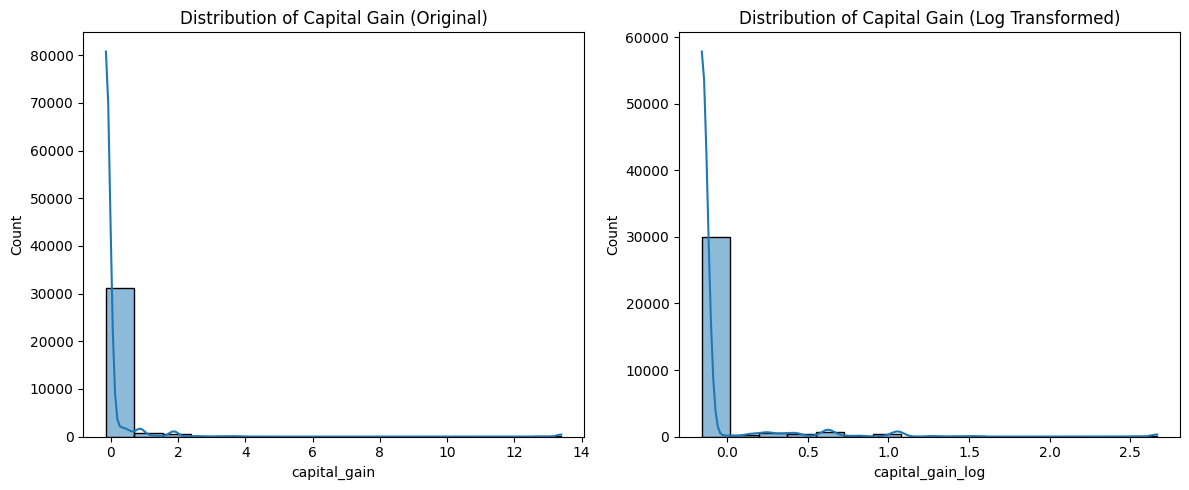

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histograms before and after log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['capital_gain'], kde=True)
plt.title('Distribution of Capital Gain (Original)')

plt.subplot(1, 2, 2)
sns.histplot(df['capital_gain_log'], kde=True)
plt.title('Distribution of Capital Gain (Log Transformed)')

plt.tight_layout()
plt.show()

In the dataset, several numerical features exhibit significant skewness, which can negatively impact model performance. To address this, log transformation was applied to the most skewed variables. The feature capital_gain showed extremely high skewness (11.95) due to the presence of many zero values and a few very large values. After applying a log transformation, the skewness reduced to 3.10, which, although still skewed, represents a considerable improvement by compressing extreme values and making the distribution more balanced. Similarly, capital_loss had a skewness of 4.59, which decreased slightly to 4.31 after transformation. This reduction, while not very large, still helps minimize the dominance of extreme outliers. Finally, fnlwgt was moderately skewed (1.45), but after applying the log transformation, its skewness improved significantly to -0.84, resulting in a much more symmetric distribution.

Overall, applying log transformations to these features reduces the effect of extreme values, stabilizes variance, and helps in making the data more suitable for machine learning algorithms, particularly those that assume normality in their input features.
